<a href="https://colab.research.google.com/github/krithi0506/KTV/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#load the data
from google.colab import files
uploaded=files.upload()

Saving implementation.csv to implementation.csv


In [ ]:
df=pd.read_csv('implementation.csv')
df.head(7)

,ID,CC_area,CC_perimeter,CC_circularity,CC_length,W1,W2,W3,W4,W5,W6,W7,GROUP
0,./Caltech/0051456/session_1/anat_1/abide_cc,646.25,208.77,0.186321,72.5,13.00,139.75,88.75,84.25,58.50,50.50,211.50,1
1,./Caltech/0051457/session_1/anat_1/abide_cc,638.50,216.94,0.170480,79.5,26.50,161.75,94.25,70.00,54.00,56.75,175.25,1
2,./Caltech/0051458/session_1/anat_1/abide_cc,610.75,205.70,0.181383,75.5,8.50,118.75,103.25,68.75,63.50,57.00,191.00,1
3,./Caltech/0051459/session_1/anat_1/abide_cc,649.00,213.80,0.178414,78.5,30.25,151.25,99.25,64.25,44.50,55.25,204.25,1
4,./Caltech/0051460/session_1/anat_1/abide_cc,633.75,203.80,0.191738,68.5,36.00,135.75,85.75,72.00,63.50,50.75,190.00,1
5,./Caltech/0051461/session_1/anat_1/abide_cc,404.75,192.56,0.137172,68.5,25.75,80.00,75.50,55.75,49.25,29.75,88.75,1
6,./Caltech/0051462/session_1/anat_1/abide_cc,787.00,225.29,0.194854,79.5,39.25,163.50,120.75,89.25,78.25,67.00,229.00,1


In [ ]:
#get the shape of the data
df.shape

(1100, 13)

In [ ]:
#count the empty values in each column
df.isna().sum()

ID                 0
 CC_area           0
 CC_perimeter      0
 CC_circularity    0
 CC_length         0
 W1                0
 W2                0
 W3                0
 W4                0
 W5                0
 W6                0
 W7                0
GROUP              0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
#view some basic statistics
df.describe()

,CC_area,CC_perimeter,CC_circularity,CC_length,W1,W2,W3,W4,W5,W6,W7,GROUP
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,596.776136,197.220936,0.192353,70.644545,20.823182,128.820455,91.398636,69.531818,59.221818,51.984318,174.996136,1.518182
std,106.393394,16.811514,0.021463,5.500229,12.714564,32.883665,19.737093,13.561574,12.087098,12.902119,33.416525,0.499897
min,313.500000,154.450000,0.113354,53.500000,0.250000,0.000000,45.250000,31.500000,27.500000,21.000000,80.750000,1.000000
25%,523.187500,184.887500,0.178223,66.500000,14.000000,110.750000,77.937500,59.937500,50.750000,42.750000,151.250000,1.000000
50%,588.875000,196.610000,0.191393,70.500000,19.000000,127.250000,89.625000,68.750000,58.250000,50.250000,173.125000,2.000000
75%,664.500000,208.000000,0.207030,74.500000,25.000000,148.500000,102.500000,77.500000,66.562500,59.500000,196.062500,2.000000
max,1023.750000,263.330000,0.264734,90.500000,150.250000,275.750000,219.000000,124.500000,106.250000,105.500000,314.250000,2.000000


In [ ]:
#Get a count of children with autism and without autism
df['GROUP'].value_counts()

2    570
1    530
Name: GROUP, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


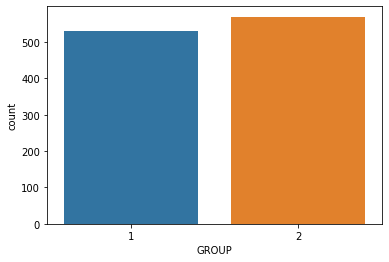

In [ ]:
#visualize the count
sns.countplot(df['GROUP'])

In [ ]:
#get the correlation
df.corr()

,CC_area,CC_perimeter,CC_circularity,CC_length,W1,W2,W3,W4,W5,W6,W7,GROUP
CC_area,1.000000,0.787921,0.388335,0.710320,0.365278,0.741684,0.702518,0.891100,0.866237,0.848235,0.897618,-0.003219
CC_perimeter,0.787921,1.000000,-0.251789,0.888800,0.476855,0.429769,0.685492,0.656166,0.654255,0.588087,0.769404,-0.051854
CC_circularity,0.388335,-0.251789,1.000000,-0.220006,-0.133320,0.516957,0.073205,0.413815,0.376962,0.439766,0.261083,0.073404
CC_length,0.710320,0.888800,-0.220006,1.000000,0.316229,0.422234,0.599240,0.651035,0.596483,0.534730,0.685390,-0.012705
W1,0.365278,0.476855,-0.133320,0.316229,1.000000,-0.063093,0.407287,0.268123,0.281587,0.264042,0.291421,-0.005864
W2,0.741684,0.429769,0.516957,0.422234,-0.063093,1.000000,0.239147,0.663068,0.602302,0.550079,0.560776,-0.004160
W3,0.702518,0.685492,0.073205,0.599240,0.407287,0.239147,1.000000,0.636977,0.560931,0.561325,0.577656,-0.016690
W4,0.891100,0.656166,0.413815,0.651035,0.268123,0.663068,0.636977,1.000000,0.845498,0.710337,0.720484,0.012900
W5,0.866237,0.654255,0.376962,0.596483,0.281587,0.602302,0.560931,0.845498,1.000000,0.768382,0.725323,-0.018137
W6,0.848235,0.588087,0.439766,0.534730,0.264042,0.550079,0.561325,0.710337,0.768382,1.000000,0.775038,-0.010836


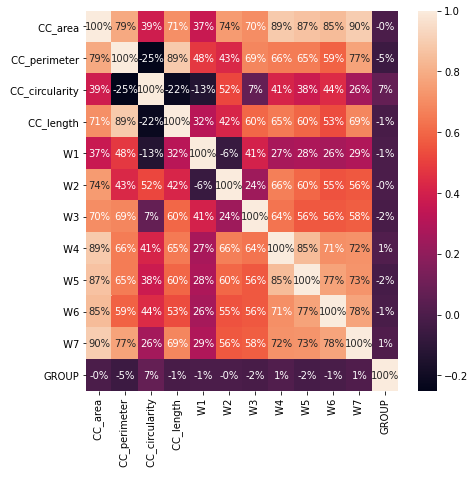

In [ ]:
#visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [ ]:
#remove the id column
df=df.drop('ID',axis=1)

In [ ]:
#split the data into feature data and target data
X=df.iloc[:, :-1].values
Y=df.iloc[:, -1].values

In [ ]:
# split the data , into 75% training data set and 25% testing data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [ ]:
#feature Scaling
#scale the value in the data to be values between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
#use random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#test the model accuracy on the training data set
model=forest
model.score(X_train,Y_train)

0.9842424242424243

In [ ]:
#test the models accuracy  on the test data set
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,model.predict(X_test))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Model Test Accuracy ={}'.format((TP+TN)/(TP+TN+FN+FP)))

Model Test Accuracyy =0.48


In [ ]:
n_estimators=[int(x) for x in np.linspace(start=10, stop=80,num=10)]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstrap=[True,False]

In [ ]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf_Model=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid=GridSearchCV(estimator=rf_Model,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [ ]:
rf_Grid.fit(X_train,Y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   20.3s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   33.9s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   49.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25}

In [ ]:
print(f'Train accuracy - : {rf_Grid.score(X_train,Y_train):.3f}')
print(f'Test accuracy - : {rf_Grid.score(X_test,Y_test):.3f}')

Train accuracy - : 0.686
Test accuracy - : 0.513
